In [1]:
!pip install opencv-python mediapipe sklearn matplotlib

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [5]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [7]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [8]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('HAPPY HANDS', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
frame

array([[[140, 150, 146],
        [140, 150, 147],
        [138, 147, 146],
        ...,
        [176, 189, 166],
        [177, 189, 166],
        [177, 189, 166]],

       [[141, 150, 144],
        [142, 150, 146],
        [141, 148, 147],
        ...,
        [181, 188, 166],
        [184, 189, 167],
        [183, 187, 166]],

       [[140, 147, 146],
        [140, 148, 147],
        [139, 148, 147],
        ...,
        [177, 190, 167],
        [178, 190, 167],
        [178, 190, 167]],

       ...,

       [[183, 176, 150],
        [180, 170, 142],
        [174, 161, 131],
        ...,
        [119, 101,  81],
        [118,  99,  80],
        [115,  97,  77]],

       [[185, 181, 159],
        [179, 174, 147],
        [172, 164, 134],
        ...,
        [123, 104,  88],
        [119, 102,  85],
        [117, 100,  82]],

       [[191, 182, 163],
        [183, 174, 153],
        [176, 165, 142],
        ...,
        [121, 107,  87],
        [120, 105,  87],
        [118, 104,  86]]

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
draw_landmarks(frame, results)

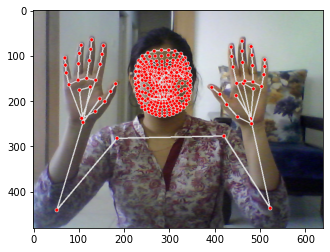

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [16]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [17]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [19]:
result_test = extract_keypoints(results)

In [20]:
result_test

array([ 0.42666015,  0.34630692, -0.82186615, ...,  0.11081151,
        0.21956527, -0.04632281])

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.50812972,  0.26122344, -0.64002091, ...,  0.15600435,
        0.22233996, -0.03699805])

# 4. Setup Folders for Collection

In [21]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
    cap.release()
    cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [23]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [24]:
label_map = {label:num for num, label in enumerate(actions)}

In [25]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [26]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [27]:
np.array(sequences).shape

(90, 30, 1662)

In [28]:
np.array(labels).shape

(90,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(90, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [33]:
X_train.shape

(85, 30, 1662)

In [34]:
X_test.shape

(5, 30, 1662)

In [35]:
y_train.shape

(85, 3)

In [36]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Model
from keras.models import load_model

In [38]:
log_dir = os.path.join('Logs1')
tb_callback = TensorBoard(log_dir=log_dir)

In [39]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [40]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
3/3 [==============================] - 10s 645ms/step - loss: 0.3100 - categorical_accuracy: 0.8706
Epoch 2/500
3/3 [==============================] - 1s 165ms/step - loss: 0.3581 - categorical_accuracy: 0.8000
Epoch 3/500
3/3 [==============================] - 1s 215ms/step - loss: 0.3246 - categorical_accuracy: 0.8471
Epoch 4/500
3/3 [==============================] - 1s 241ms/step - loss: 0.3629 - categorical_accuracy: 0.7765
Epoch 5/500
3/3 [==============================] - 1s 228ms/step - loss: 0.3232 - categorical_accuracy: 0.8471
Epoch 6/500
3/3 [==============================] - 1s 249ms/step - loss: 0.3251 - categorical_accuracy: 0.8471
Epoch 7/500
3/3 [==============================] - 1s 184ms/step - loss: 0.3036 - categorical_accuracy: 0.8824
Epoch 8/500
3/3 [==============================] - 1s 200ms/step - loss: 0.3052 - categorical_accuracy: 0.9294
Epoch 9/500
3/3 [==============================] - 1s 299ms/step - loss: 0.2999 - categorical_accuracy: 0.8941


3/3 [==============================] - 0s 155ms/step - loss: 0.3239 - categorical_accuracy: 0.8706
Epoch 75/500
3/3 [==============================] - 0s 146ms/step - loss: 0.3312 - categorical_accuracy: 0.8353
Epoch 76/500
3/3 [==============================] - 0s 163ms/step - loss: 0.3074 - categorical_accuracy: 0.8471
Epoch 77/500
3/3 [==============================] - 0s 156ms/step - loss: 0.2602 - categorical_accuracy: 0.9294
Epoch 78/500
3/3 [==============================] - 0s 159ms/step - loss: 0.2654 - categorical_accuracy: 0.9059
Epoch 79/500
3/3 [==============================] - 1s 170ms/step - loss: 0.2625 - categorical_accuracy: 0.8941
Epoch 80/500
3/3 [==============================] - 0s 146ms/step - loss: 0.2787 - categorical_accuracy: 0.8588
Epoch 81/500
3/3 [==============================] - 0s 160ms/step - loss: 0.2522 - categorical_accuracy: 0.9176
Epoch 82/500
3/3 [==============================] - 0s 142ms/step - loss: 0.2257 - categorical_accuracy: 0.9294
Epoch

3/3 [==============================] - 1s 187ms/step - loss: 0.1674 - categorical_accuracy: 0.9294
Epoch 147/500
3/3 [==============================] - 1s 243ms/step - loss: 0.1575 - categorical_accuracy: 0.9412
Epoch 148/500
3/3 [==============================] - 1s 190ms/step - loss: 0.3592 - categorical_accuracy: 0.8471
Epoch 149/500
3/3 [==============================] - 1s 206ms/step - loss: 0.3602 - categorical_accuracy: 0.8471
Epoch 150/500
3/3 [==============================] - 1s 204ms/step - loss: 1.1749 - categorical_accuracy: 0.6353
Epoch 151/500
3/3 [==============================] - 1s 230ms/step - loss: 0.9973 - categorical_accuracy: 0.6588
Epoch 152/500
3/3 [==============================] - 1s 189ms/step - loss: 0.5822 - categorical_accuracy: 0.7529
Epoch 153/500
3/3 [==============================] - 0s 171ms/step - loss: 0.4104 - categorical_accuracy: 0.8588
Epoch 154/500
3/3 [==============================] - 1s 203ms/step - loss: 0.4565 - categorical_accuracy: 0.77

3/3 [==============================] - 1s 176ms/step - loss: 0.1739 - categorical_accuracy: 0.9294
Epoch 219/500
3/3 [==============================] - 1s 188ms/step - loss: 0.1776 - categorical_accuracy: 0.9294
Epoch 220/500
3/3 [==============================] - 1s 200ms/step - loss: 0.2553 - categorical_accuracy: 0.8941
Epoch 221/500
3/3 [==============================] - 1s 179ms/step - loss: 0.1951 - categorical_accuracy: 0.9176
Epoch 222/500
3/3 [==============================] - 0s 158ms/step - loss: 0.1586 - categorical_accuracy: 0.9412
Epoch 223/500
3/3 [==============================] - 0s 156ms/step - loss: 0.1648 - categorical_accuracy: 0.9412
Epoch 224/500
3/3 [==============================] - 0s 162ms/step - loss: 0.1293 - categorical_accuracy: 0.9529
Epoch 225/500
3/3 [==============================] - 0s 165ms/step - loss: 0.1557 - categorical_accuracy: 0.9294
Epoch 226/500
3/3 [==============================] - 0s 167ms/step - loss: 0.1695 - categorical_accuracy: 0.90

3/3 [==============================] - 1s 212ms/step - loss: 0.1079 - categorical_accuracy: 0.9647
Epoch 291/500
3/3 [==============================] - 1s 170ms/step - loss: 0.1150 - categorical_accuracy: 0.9529
Epoch 292/500
3/3 [==============================] - 1s 187ms/step - loss: 0.1206 - categorical_accuracy: 0.9647
Epoch 293/500
3/3 [==============================] - 1s 193ms/step - loss: 0.0968 - categorical_accuracy: 0.9765
Epoch 294/500
3/3 [==============================] - 1s 189ms/step - loss: 0.1282 - categorical_accuracy: 0.9529
Epoch 295/500
3/3 [==============================] - 1s 176ms/step - loss: 0.1038 - categorical_accuracy: 0.9529
Epoch 296/500
3/3 [==============================] - 1s 178ms/step - loss: 0.0881 - categorical_accuracy: 0.9529
Epoch 297/500
3/3 [==============================] - 1s 192ms/step - loss: 0.0891 - categorical_accuracy: 0.9647
Epoch 298/500
3/3 [==============================] - 1s 183ms/step - loss: 0.1040 - categorical_accuracy: 0.96

KeyboardInterrupt: 

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [61]:
res = model.predict(X_test)

In [62]:
actions[np.argmax(res[4])]

'hello'

In [63]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [69]:
model.save('model.h5')

In [6]:
model.load_weights('model.h5')

NameError: name 'model' is not defined

# 10. Evaluation using Confusion Matrix and Accuracy

In [64]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [65]:
yhat = model.predict(X_test)

In [66]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [67]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 1],
        [1, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 1],
        [1, 0]]], dtype=int64)

In [68]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in Real Time

In [52]:
from scipy import stats

In [53]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [54]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame


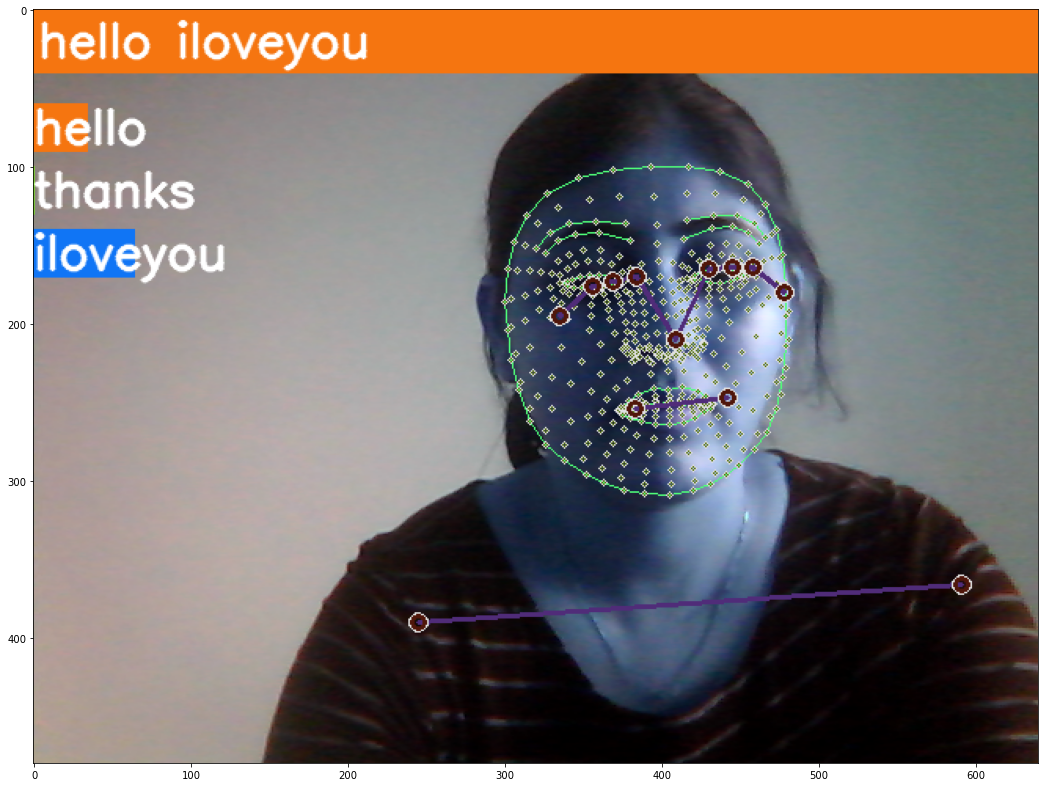

In [82]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [58]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti